In [823]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sm
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate
from matplotlib import cm


# Linear regression

Consider the following **linear equation:**

$$y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \epsilon_i$$

Assume you have access to data of the **independent variables** ($x_{1,i}$, $x_{2,i}$) and the **dependent variable** ($y_i$) for $N$ individuals, where $i$ indexes individuals. The variable $\epsilon_i$ is a mean-zero **stochastic shock**.

Assume the **data generating process** is given by:

In [824]:
def DGP(N):
    
    # a. independent variables
    x1 = np.random.normal(0,1,size=N)
    x2 = np.random.normal(0,1,size=N)
    
    # b. errors
    eps = np.random.normal(0,1,size=N)
    
    extreme = np.random.uniform(0,1,size=N)
    eps[extreme < 0.05] += np.random.normal(-5,1,size=N)[extreme < 0.05]
    eps[extreme > 0.95] += np.random.normal(5,1,size=N)[extreme > 0.95]
    
    # c. dependent variable
    y = 0.1 + 0.3*x1 + 0.5*x2 + eps
    
    return x1, x2, y

**The data you have access to is:**

In [825]:
np.random.seed(2020)
x1,x2,y = DGP(10000)

**Question 1:** Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **ordinary least squares (OLS)** implemented with **matrix algebra** by

$$ \hat{\mathbf{\beta}} = (\mathbf{X}^{\prime}\mathbf{X})^{-1}\mathbf{X}^{\prime}\mathbf{y} $$

where $\mathbf{X}^{\prime}$ is the transpose of $\mathbf{X}$ and

$$\mathbf{y} = 
\pmatrix{ y_1 \cr y_2 \cr  \vdots \cr y_N 
}
, \quad \mathbf{X} = \pmatrix{
1 & x_{1,1} & x_{2,1} \cr 
1 & x_{1,2} & x_{2,2} \cr 
\vdots & \vdots \cr 
1 & x_{1,N} & x_{2,N} 
} $$

**Question 2:** Construct a 3D plot, where the data is plotted as scattered points, and the prediction of the model is given by the plane

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{1,i} + \hat{\beta}_2 x_{2,i}$$

**Question 3:** Esimtate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using a **numerical solver** to solve the ordinary least square problem, shown below, directly. Compare your results with the matrix algebra results.

$$ \min_{\mathbf{\beta}} \sum^N_{i=1} (y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) )^2 $$

**Question 4:** Estimate the vector of coefficients $\mathbf{\beta} = (\beta_0,\beta_1,\beta_2)$ using **least absolute deviations (LAD)** using a numerical solver to solve the following problem directly: 

$$  \min_{\beta} \sum^N_{i=1} |y_i - (\beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i}) | $$

where $|z|$ is the absolute value of $z$.

**Question 5:** Set $N = 50$. Repeat the estimation using the **OLS** and **LAD** methods $K=5000$ times, drawing a new random sample from the data generating process each time. Compare the estimates from each method using histograms. Which method do you prefer? Explain your choice.

# Durable purchases

Consider a **household** living in two periods.

In the **second period** it gets utility from **non-durable consumption**, $c$, and **durable consumption**, $d+\chi x$:

$$
\begin{aligned}
v_{2}(m_{2},d)&= \max_{c}\frac{(c^{\alpha}(d+\chi x)^{1-\alpha})^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
x &= m_{2}-c \\
c &\in [0,m_{2}]
\end{aligned}
$$

where 

* $m_2$ is cash-on-hand in the beginning of period 2
* $c$ is non-durable consumption
* $d$ is pre-commited durable consumption
* $x = m_2 - c$ is extra durable consumption
* $\rho > 1$ is the risk aversion coefficient
* $\alpha \in (0,1)$ is the utility weight on non-durable consumption
* $\chi \in (0,1)$ implies that extra durable consumption is *less* valuable than pre-comitted durable consumption
* the second constraint ensures the household *cannot* die in debt

The **value function** $v_2(m_2,d)$ measures the household's value of having $m_2$ at the beginning of period 2 with precomitted durable consumption of $d$. The optimal choice of non-durable consumption is denoted $c^{\ast}(m_2,d)$. The optimal extra durable consumption function is $x^{\ast}(m_2,d) = m_2-c^{\ast}(m_2,d)$.

Define the so-called **end-of-period 1 value function** as:

$$
\begin{aligned}
w(a,d)&\equiv\beta\mathbb{E}_{1}\left[v_2(m_2,d)\right]
\end{aligned}
$$

where 

$$
\begin{aligned}
m_2&= (1+r)a+y \\
y &= \begin{cases}
1-\Delta & \text{with prob. }\frac{1}{3}\\
1 & \text{with prob. }\frac{1}{3}\\
1+\Delta & \text{with prob. }\frac{1}{3}
\end{cases}\\
\end{aligned}
$$

and

* $a$ is assets at the end of period 1
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk (mean-preserving)
* $r$ is the return on savings

In the **first period**, the household chooses it's pre-comitted level of durable consumption for the next-period,

$$
\begin{aligned}
v_{1}(m_{1})&=\max_{d} w(a,d)\\&\text{s.t.}&\\
a&= m_{1}-d \\
d&\in [0,m_{1}]\\
\end{aligned}
$$

where $m_1$ is cash-on-hand in period 1. The second constraint ensures the household *cannot* borrow. The **value function** $v_1(m_1)$ measures the household's value of having $m_1$ at the beginning of period 1. The optimal choice of pre-committed durable consumption is denoted $d^{\ast}(m_1)$.

The **parameters** and **grids** for $m_1$, $m_2$ and $d$ should be:

In [826]:
# a. parameters
rho = 2
alpha = 0.8
beta = 0.96
r = 0.04
Delta = 0.25
chi = 0.9

# b. grids
m1_vec = np.linspace(1e-8,10,100)
m2_vec = np.linspace(1e-8,10,100)
d_vec = np.linspace(1e-8,5,100)

**Question 1:** Find and plot the functions $v_{2}(m_{2},d)$, $c^{\ast}(m_2,d)$, and $x^{\ast}(m_2,d)$. Comment.

In [827]:

def v22(m2, d, c2,chi = Chi, rho = rho, alpha = alpha):
    x = m2 - c2
    return (c**alpha*(d+chi*x)**(1-alpha))**(1-rho)/(1-rho)

def v11(c1, d1, m1, alpha, rho, beta, r, delta, a, v2_interp):
    m2_low = (1+r)*a+(1-delta)
    v2_low = v2_interp([m2_low, d1])[0]

    m2_med = (1+r)*a+1
    v2_med = v2_interp([m2_med,d1])[0]

    m2_high = (1+r)*a+(1+delta)
    v2_high = v2_interp([m2_high,d1])[0]

    v2 = 1/3 * v2_low + 1/3 * v2_med + 1/3 * v2_high
    return v2*beta



In [887]:
x2_matrix = np.empty((100,100))
# We are defining a solver to return v2 and c2 as arrays
# We are useing matrixes because we want to optimize both v2 and c2
def solve_v22(alpha, rho, chi):
    m2_vec = np.linspace(1e-8,10,100)
    # We are defining the shape to match the linspace for the two vectors
    v2_matrix = np.empty((100,100))
    c2_matrix = np.empty((100,100))
    x2_matrix = np.empty((100,100))
    
    # Makeing out optimizer for every observation in the vectors for m2 and d2
    for i, m2 in enumerate(m2_vec):
        for j, d2 in enumerate(d2_vec):
            # We want our object to be our function we defined before and makeing it negative so we are optimizeing insted of minimizing 
            obj = lambda c2: -v22(c2, d_vec[i], m2, alpha, rho, chi)

            # Making an initial guess for our optimizer 
            x0 = 1/2 * m2

            # Optimizing
            sol = optimize.minimize_scalar(obj , x0, method = 'bounded', bounds = [1e-8,m2])
            # we award v2_matrix af our function-matrix and c2_matrix as out variable-matrix
            v2_matrix[i,j] = -sol.fun
            c2_matrix[i,j] = sol.x
            x2_matrix[i,j] = m2 - sol.x

        return m2_vec, d2_vec, v2_matrix, c2_matrix, x2_matrix
print(x2_matrix)

[[ 1.15920109e-311  1.15927356e-311  6.95287692e-310 ...  1.98855386e-289
               nan              nan]
 [             nan  4.55694781e-304  2.20458367e-291 ...  1.74994828e-302
   8.87204234e-301  1.73261211e-298]
 [             nan  1.07511879e-298  1.04525525e-299 ...  7.93617273e-301
   4.66943326e-301              nan]
 ...
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...  8.91854406e-001
   4.04781551e-001 -1.10245139e+000]
 [-1.15045381e+000 -4.71673756e-001 -3.61245719e-001 ... -1.44286811e+000
  -1.06686445e-001  5.59081845e-001]]


In [883]:

c22_vec = np.meshgrid(c2_matrix)



In [884]:
# We start by defining our value function v2. 
def v2(m2, d, c2,chi = Chi, rho = rho, alpha = alpha):
    x = m2 - c2
    return (c**alpha*(d+chi*x)**(1-alpha))**(1-rho)/(1-rho)


In [874]:
# Solver
def solver_v2(c2_vec, d_vec, chi, rho, alpha):
    v2_vec = np.empty(100)
    c2_vec = np.empty(100)
    d_vec = np.linspace(1e-8,5,100)
    m2_vec = np.linspace(1e-8,10,100)

    for i, m2, d in enumerate(m2_vec, d_vec):
        obj = lambda c2: -v2(m2, d, c2,chi = Chi, rho = rho, alpha = alpha) 
        
        x0 = 1/2*m2

        sol = optimize.minimize_scalar(obj, x0, method = 'bounded', bounds = [1e-8,m2])

        c2_vec[i] = sol.x
        v2_vec[i] = -sol.fun
    return m2_vec, d_vec, v2_vec, c2_vec



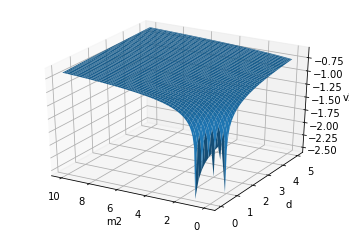

In [832]:
# plotting the v2 function
fig = plt.figure()
ax = plt.axes(projection = '3d')

m2_graph, d_graph = np.meshgrid(m2_vec, d_vec)
v2_graph = v2(m2_graph, d_graph,c)

ax.plot_surface(m2_graph, d_graph, v2_graph)
ax.set_xlabel('m2')
ax.set_ylabel('d')
ax.set_zlabel('v2')
ax.invert_xaxis()
plt.show()


We find that the higher the m2 and d, the higher the v2.
ie. the more money the household saves for period 2, the more utility they get. We also noticed that the we have decreasing returns to scale for the plan for both m2 and d. 


**Question 2:** Find and plot the functions $v_{1}(m_{1})$ and $d^{\ast}(m_1)$. Comment.

In [833]:

def v1(c1, v2_interp, m1, d, beta, delta = Delta, r = r):
    a = m1 - d
    m2_low = (1+r)*a+(1-delta)
    v2_low = v2_interp([m2_low])[0]

    m2_medium = (1+r)*a+1
    v2_medium = v2_interp([m2_medium])[0]

    m2_high = (1+r)*a+(1+delta)
    v2_high = v2_interp([m2_high])[0]

    v2 = 1/3*v2_low + 1/3*v2_medium + 1/3*v2_high
    return beta*v2


def solver_v1(c1_vec, v2_interp, rho, delta,  r):
    v1_vec = np.empty(100)
    c1_vec = np.empty(100)
    m1_vec = np.linspace(1e-8,10,100)

    for i,m1 in enumerate(m1_vec):
        obj = lambda c1: -v1(m1, d,beta, delta = Delta,r=r)

        x0 = 1/2*m1

        sol = optimize.minimize_scalar(obj, x0, method='bounded', bounds =[1e-8,m1])
        c1_vec[i] = sol.x
        v1_vec[i] = -sol.fun
        
    return m1_vec, v1_vec, c1_vec

def solver():
    m2_vec, d_vec, v2_vec,c2_vec = solver_v2(c2_vec, d_vec, chi, rho, alpha)

    v2_interp = interpolate.RegularGridInterpolator([m2_vec,d_vec],v2_vec,bounds_error=False,fill_value=None)

    m1_vec,d_vec, v1_vec,c1_vec = solver_v1(c1_vec, d_vec, v2_interp, rho, delta, r)

    return m1_vec, d_vec, c1_vec



Text(0, 0.5, 'd')

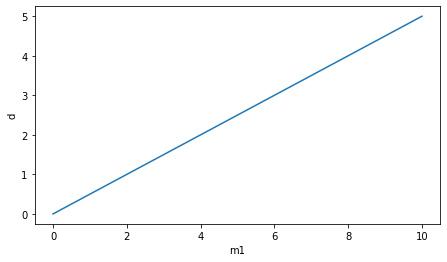

In [834]:
# Plotting d(m1)
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,2,1)
ax.plot(m1_vec, d_vec)
ax.set_xlabel('m1')
ax.set_ylabel('d')


Text(0, 0.5, 'v1')

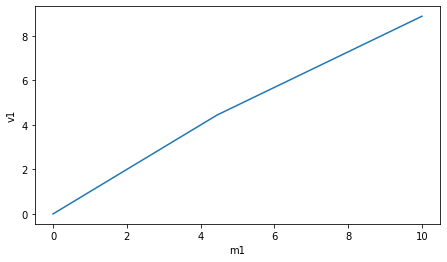

In [835]:
#plotting v1(m1)
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(1,2,1)
ax.plot(m1_vec,v1_vec)
ax.set_xlabel('m1')
ax.set_ylabel('v1')


ValueError: x and y must have same first dimension, but have shapes (100,) and (1, 100)

**Hint:** For interpolation of $v_2(m_2,d)$ consider using `interpolate.RegularGridInterpolator([GRID-VECTOR1,GRID-VECTOR2],VALUE-MATRIX,bounds_error=False,fill_value=None)`.

Next, consider an **extension** of the model, where there is also a **period 0**. In this period, the household makes a choice whether to stick with the level of durables it has, $z = 0$, or adjust its stock of durables, $z = 1$. If adjusting, the household loses a part of the value of its durable stock; more specificaly it incurs a proportional loss of $\Lambda \in (0,1)$.

Mathematically, the **household problem in period 0** is:

$$
\begin{aligned}
v_{0}(m_{0},d_{0}) &= \max_{z\in\{0,1\}} \begin{cases}
w(m_{0},d_{0}) & \text{if } z = 0\\
v_1(m_0+(1-\Lambda) d_{0}) & \text{if } z = 1\\
\end{cases}\\
\end{aligned}
$$

The **parameters** and **grids** for $m_0$ and $d_0$ should be:

In [836]:
Lambda = 0.2
m0_vec = np.linspace(1e-8,6,100)
d0_vec = np.linspace(1e-8,3,100)

**Question 3:** For which values of $m_0$ and  $d_0$ is the optimal choice not to adjust, i.e. $z = 0$? Show this in a plot. Give an interpretion of your results.

# Gradient descent

Let $\boldsymbol{x} = \left[\begin{array}{c}
x_1 \\
x_2\\
\end{array}\right]$ be a two-dimensional vector. Consider the following algorithm:

**Algorithm:** `gradient_descent()`

**Goal:** Minimize the function $f(\boldsymbol{x})$.

1. Choose a tolerance $\epsilon>0$, a scale factor $ \Theta > 0$, and a small number $\Delta > 0$
2. Guess on $\boldsymbol{x}_0$ and set $n=1$
3. Compute a numerical approximation of the jacobian for $f$ by

    $$
    \nabla f(\boldsymbol{x}_{n-1}) \approx \frac{1}{\Delta}\left[\begin{array}{c}
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    \Delta\\
    0
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})\\
    f\left(\boldsymbol{x}_{n-1}+\left[\begin{array}{c}
    0\\
    \Delta
    \end{array}\right]\right)-f(\boldsymbol{x}_{n-1})
    \end{array}\right]
    $$

4. Stop if the maximum element in $|\nabla f(\boldsymbol{x}_{n-1})|$ is less than $\epsilon$
5. Set $\theta = \Theta$ 
6. Compute $f^{\theta}_{n} = f(\boldsymbol{x}_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1}))$
7. If $f^{\theta}_{n} < f(\boldsymbol{x}_{n-1})$ continue to step 9
8. Set $\theta = \frac{\theta}{2}$ and return to step 6     
9. Set $x_{n} = x_{n-1} - \theta \nabla f(\boldsymbol{x}_{n-1})$
10. Set $n = n + 1$ and return to step 3

**Question:** Implement the algorithm above such that the code below can run.

**Optimizer function:**

In [837]:
def gradient_descent(f,x0,epsilon=1e-6,Theta=0.1,Delta=1e-8,max_iter=10_000):
    pass

**Test case:**

In [838]:
def rosen(x):
    return (1.0-x[0])**2+2*(x[1]-x[0]**2)**2

x0 = np.array([1.1,1.1])
try:
    x,it = gradient_descent(rosen,x0)
    print(f'minimum found at ({x[0]:.4f},{x[1]:.4f}) after {it} iterations')
    assert np.allclose(x,[1,1])
except:
    print('not implemented yet')

not implemented yet
